In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('Iris.csv')

In [9]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#  Exploring Data & Visualization

In [10]:
#  columns/features of the dataset

list(df.columns)

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
rows, cols = df.shape

print(f'Rows: {rows}, Columns:{cols}')


Rows: 150, Columns:6


In [16]:
# missing values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
# duplicate rows

df.duplicated().sum()

0

In [18]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [56]:
## Checking numerical feature has the highest variance in the Iris dataset

df.var(numeric_only = True).sort_values(ascending= False)

Id               1887.500000
PetalLengthCm       3.113179
SepalLengthCm       0.685694
PetalWidthCm        0.582414
SepalWidthCm        0.188004
dtype: float64

In [59]:
#Detect outliers using the IQR method for all numeric features

outliers_by_feature = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outliers_by_feature[col] = outliers

# Outliers in 'SepalWidthCm'
outliers_by_feature['SepalWidthCm']

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


In [23]:
plt.style.use('fivethirtyeight')

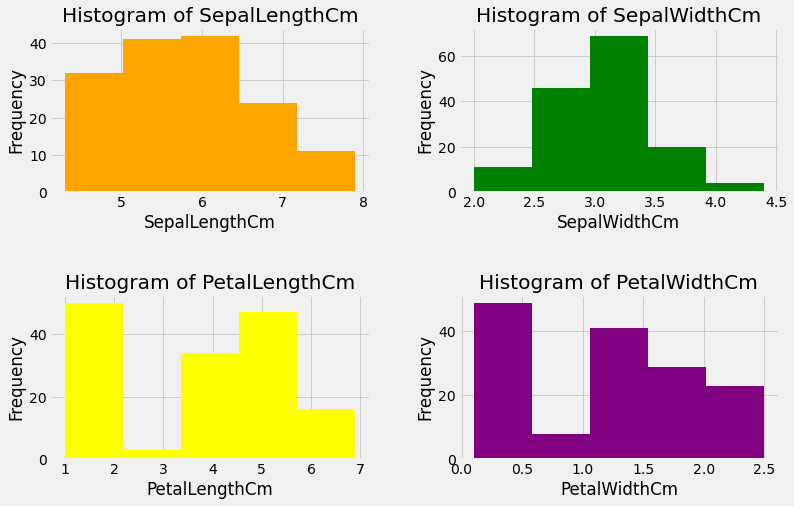

In [25]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Id')

fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 
color = ['orange', 'green', 'yellow', 'purple']

for ix, col in enumerate(numeric_cols):
    row = ix // 2
    col_pos = ix % 2
    ax = axes[row, col_pos]
    ax.hist(df[col], bins=5, color=color[ix])
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout(pad=3.0)  
plt.show()
    

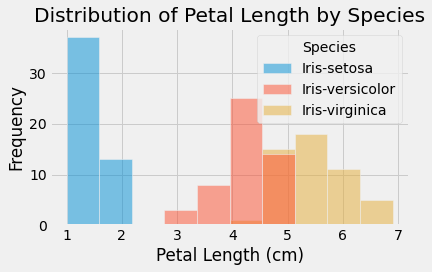

In [29]:
# Distribution of Petal Length by Species
sns.histplot(data=df, x='PetalLengthCm', hue='Species', bins=10)
plt.title('Distribution of Petal Length by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

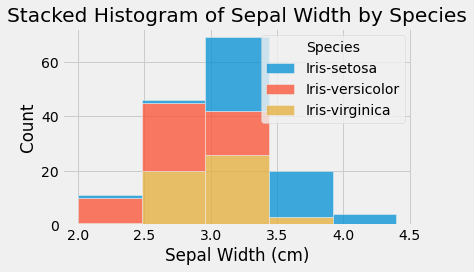

In [32]:
## Stacked Histogram of Sepal Width by Species

sns.histplot(data=df, x='SepalWidthCm', hue='Species', bins=5, multiple='stack')

plt.title('Stacked Histogram of Sepal Width by Species')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

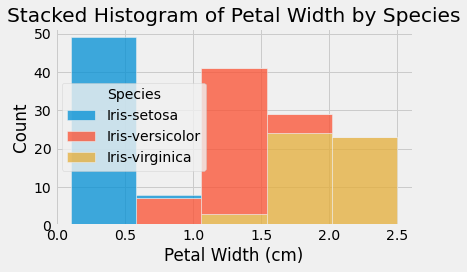

In [33]:
## Stacked Histogram of Sepal Width by Species

sns.histplot(data=df, x='PetalWidthCm', hue='Species', bins=5, multiple='stack')

plt.title('Stacked Histogram of Petal Width by Species')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

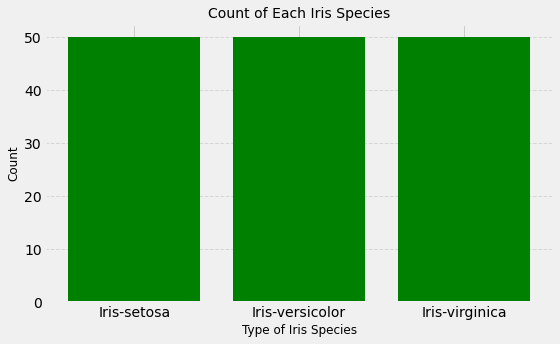

In [35]:
# frequency of each Iris species to understand class distribution

species_count = df['Species'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(species_count.index, species_count.values, color='green')
plt.title('Count of Each Iris Species', fontsize=14)
plt.xlabel('Type of Iris Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

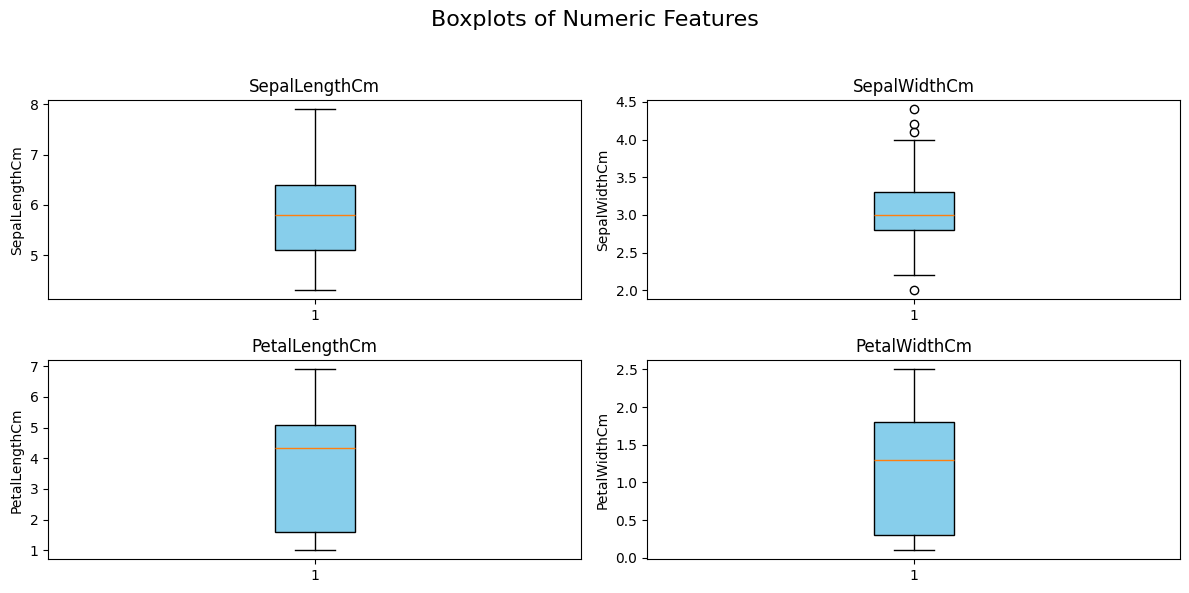

In [50]:
# Boxplots of all numeric features to detect outliers and compare distribution spread

fig, axes = plt.subplots(2, 2, figsize=(12, 6))  
fig.suptitle('Boxplots of Numeric Features', fontsize=16)

numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']  

axes = axes.flatten()

for ix, col in enumerate(numeric_cols):
    axes[ix].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='skyblue'))
    axes[ix].set_title(f'{col}')
    axes[ix].set_ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

    

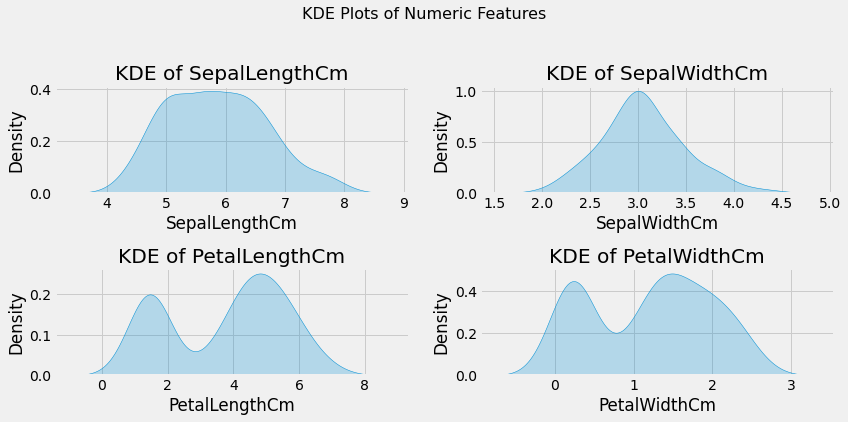

In [38]:
##KDE plots for all numeric features to visualize the distribution shape and detect skewness or multimodality
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('KDE Plots of Numeric Features', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(data=df, x=col, fill=True, ax=axes[i])
    axes[i].set_title(f'KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

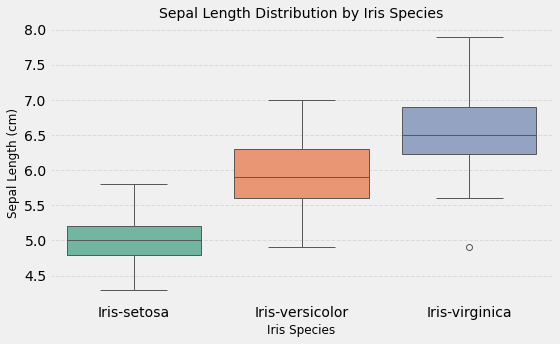

In [43]:
# Bivariate boxplot to compare Sepal Length distributions across Iris species

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Species', y='SepalLengthCm', palette='Set2')

plt.title('Sepal Length Distribution by Iris Species', fontsize=14)
plt.xlabel('Iris Species', fontsize=12)
plt.ylabel('Sepal Length (cm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [45]:
# Corelation between petalwidth and length
df['PetalWidthCm'].corr(df['PetalLengthCm'])

# petal width and petal lenght are strongly positively corelated 

0.9627570970509661

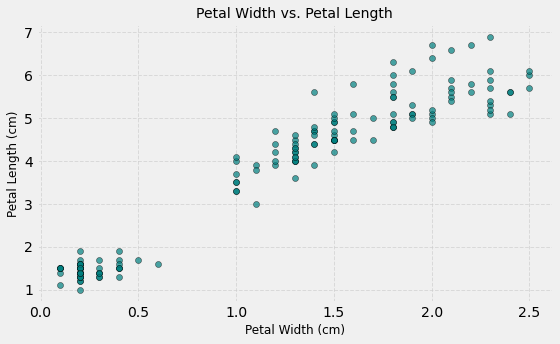

In [44]:
#Scatter plot to explore the relationship between Petal Width and Petal Length

plt.figure(figsize=(8, 5))
plt.scatter(x=df['PetalWidthCm'], y=df['PetalLengthCm'], color='teal', alpha=0.7, edgecolor='k')

plt.title('Petal Width vs. Petal Length', fontsize=14)
plt.xlabel('Petal Width (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [97]:
## Correlation between Sepal Length and Sepal Width

df['SepalLengthCm'].corr (df['SepalWidthCm'])


#The correlation coefficientsuggests that there is 
#no strong or meaningful correlation between these two features.

-0.10936924995064937

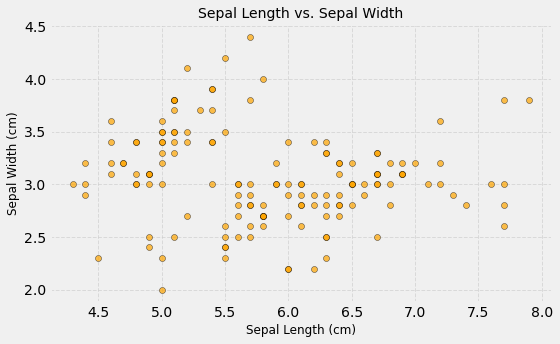

In [46]:
#Scatter plot to examine the relationship between Sepal Length and Sepal Width


plt.figure(figsize=(8, 5))
plt.scatter(x=df['SepalLengthCm'], y=df['SepalWidthCm'], color='orange', alpha=0.7, edgecolor='k')

plt.title('Sepal Length vs. Sepal Width', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

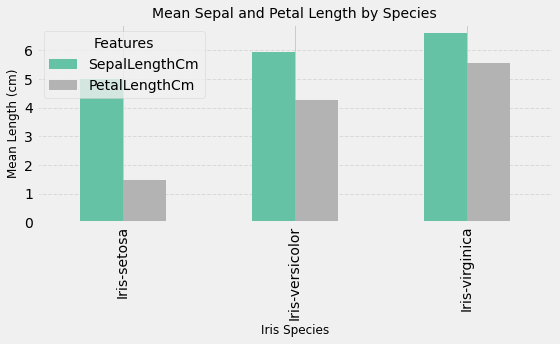

In [47]:
# Bar plot showing the mean Sepal and Petal Length for each Iris species

mean_species = df.groupby('Species')[['SepalLengthCm', 'PetalLengthCm']].mean()

mean_species.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title('Mean Sepal and Petal Length by Species', fontsize=14)
plt.xlabel('Iris Species', fontsize=12)
plt.ylabel('Mean Length (cm)', fontsize=12)
plt.legend(title='Features')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


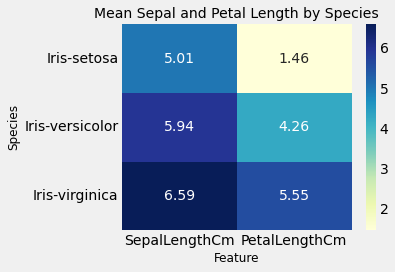

In [48]:
## Heatmap showing average Sepal and Petal Length for each Iris species

plt.figure(figsize=(6, 4))
sns.heatmap(mean_species, annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('Mean Sepal and Petal Length by Species', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Species', fontsize=12)
plt.tight_layout()
plt.show()

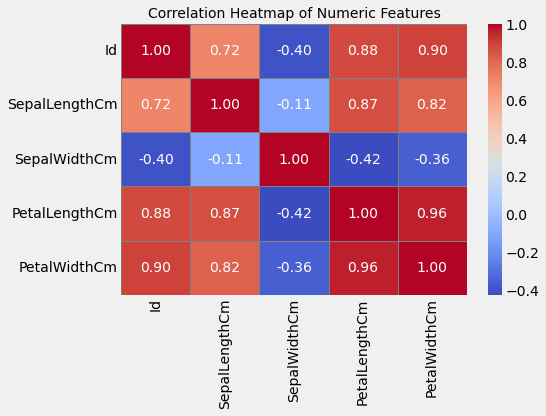

In [49]:
#Heatmap to visualize correlations between all numerical features

corr_mat = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='gray')

plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()

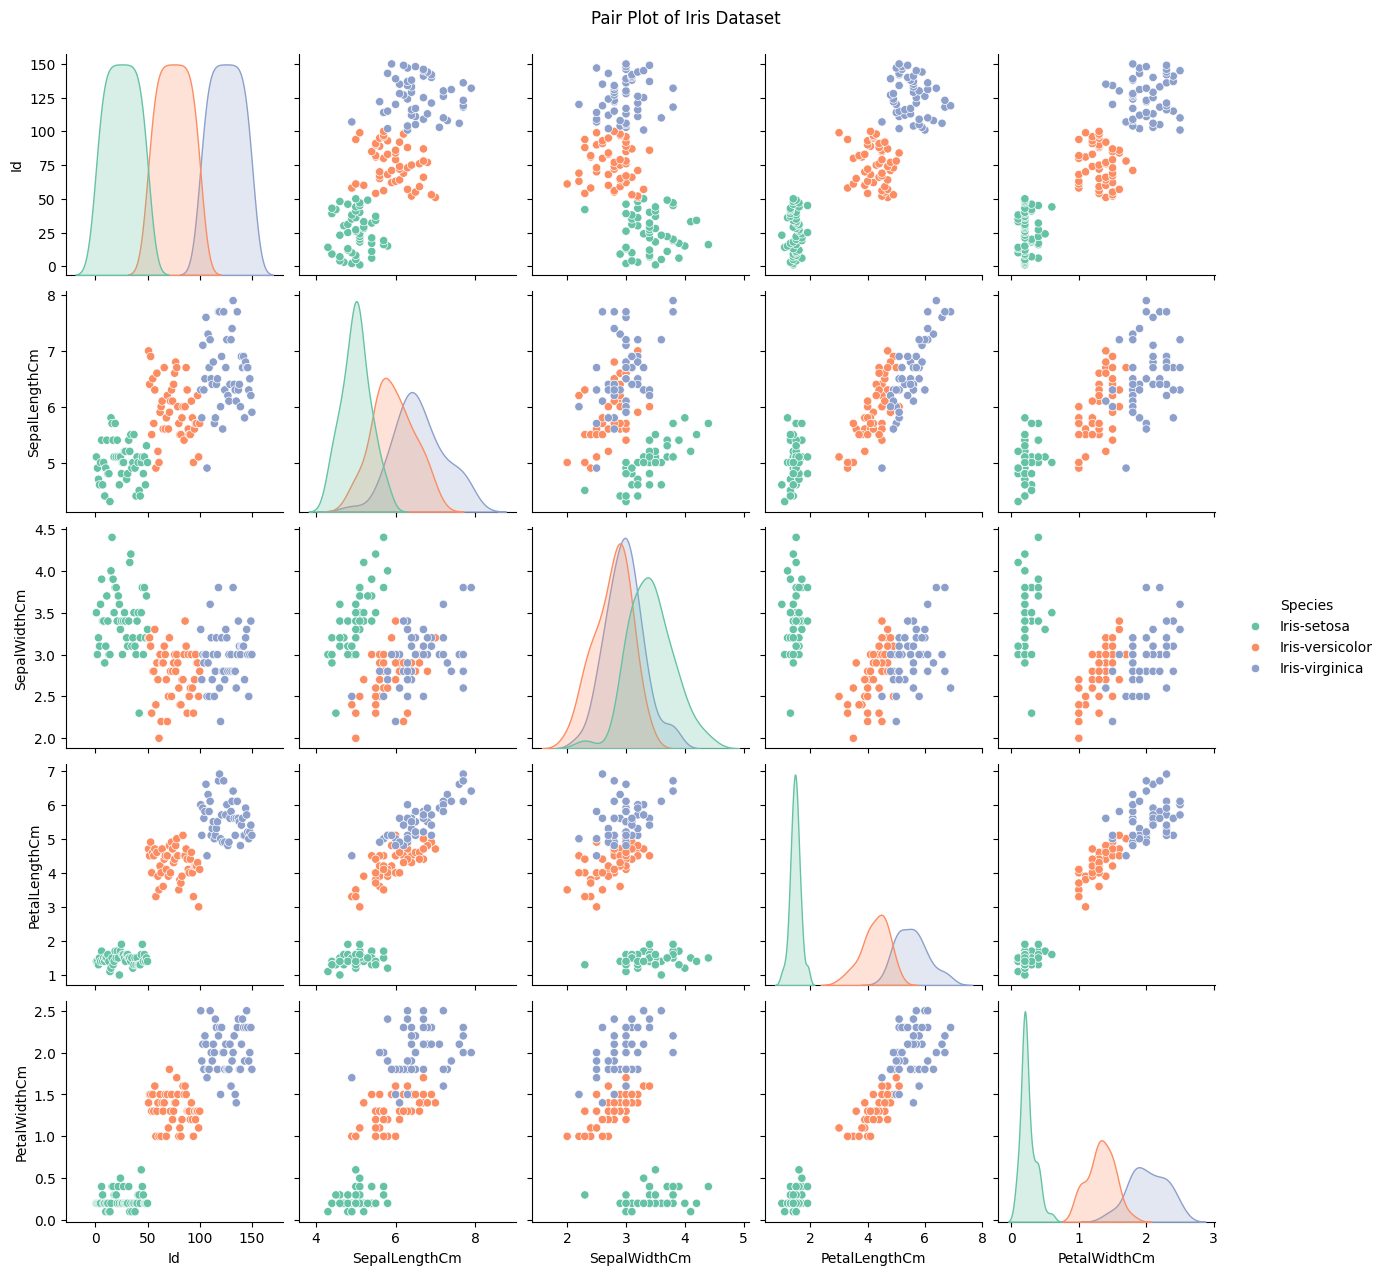

In [52]:
## Pair plot to visualize pairwise relationships and distributions across all features, grouped by species

plt.style.use('default')

sns.pairplot(df, hue = 'Species', diag_kind = 'kde', palette = 'Set2')
plt.suptitle('Pair Plot of Iris Dataset', y = 1.02)
plt.show()

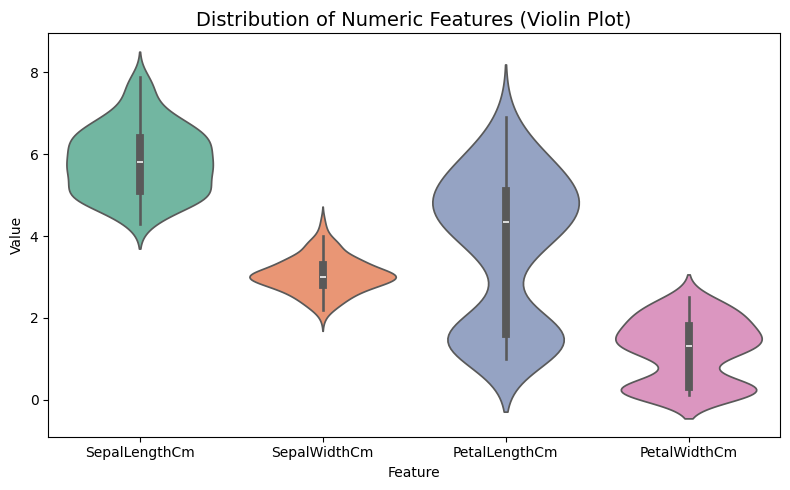

In [55]:
# Violin plot of all numeric features to show distribution and density

long_df = df.melt(value_vars=df.columns[1:5], var_name='Feature', value_name='Value')

plt.figure(figsize=(8, 5))
sns.violinplot(data=long_df, x='Feature', y='Value', palette='Set2')
plt.title('Distribution of Numeric Features (Violin Plot)', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


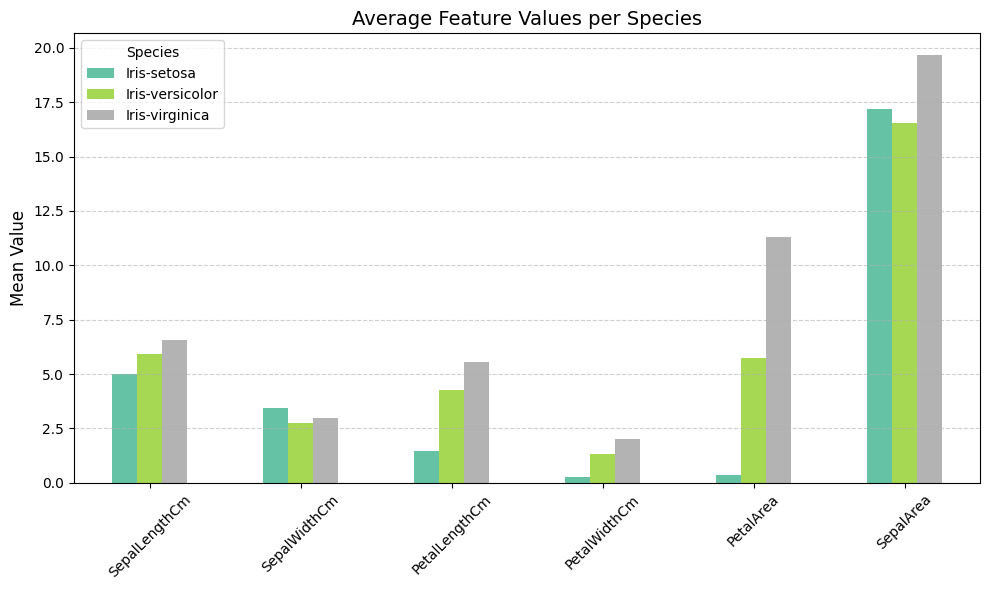

In [62]:
df.drop(columns='Id').groupby('Species').mean(numeric_only=True).T.plot(
    kind='bar', figsize=(10, 6), colormap='Set2'
)

plt.title("Average Feature Values per Species", fontsize=14)
plt.ylabel("Mean Value", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Feature Engineering 

In [60]:
# Feature engineering: Petal Area and Sepal Area
df['PetalArea'] = df['PetalLengthCm'] * df['PetalWidthCm']
df['SepalArea'] = df['SepalLengthCm'] * df['SepalWidthCm']


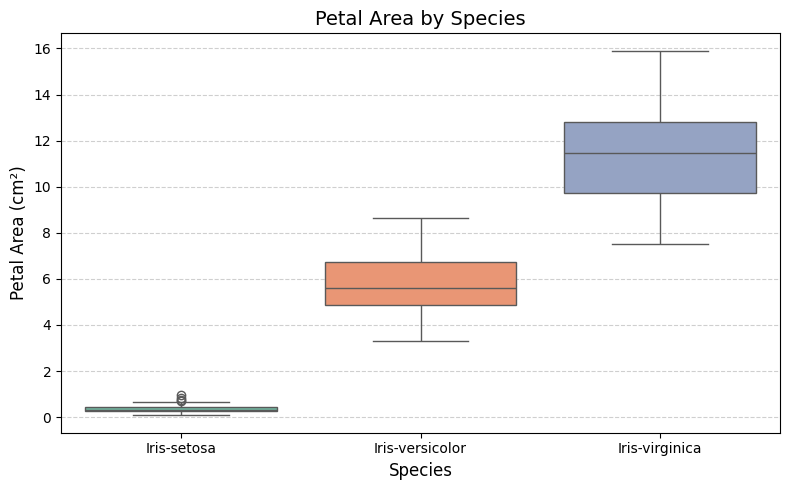

In [61]:
#Boxplot to compare Petal Area across Iris species

plt.figure(figsize=(8, 5))
sns.boxplot(x='Species', y='PetalArea', data=df, palette='Set2')

plt.title('Petal Area by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Petal Area (cm²)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()